In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplot
import seaborn as sns
import scipy.stats
from math import sqrt
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
ratings_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/teachingratings.csv'
ratings_df = pd.read_csv(ratings_url)

In [ ]:
ratings_df.head()

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1,0,1,1,0,1,1,1
1,yes,36,female,more,0.289916,3.7,upper,yes,yes,86,125,1,0,1,1,0,1,1,1
2,yes,36,female,more,0.289916,3.6,upper,yes,yes,76,125,1,0,1,1,0,1,1,1
3,yes,36,female,more,0.289916,4.4,upper,yes,yes,77,123,1,1,1,1,0,1,1,1
4,no,59,male,more,-0.737732,4.5,upper,yes,yes,17,20,2,0,0,0,0,1,1,1


To get information about each variable


In [5]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   minority         463 non-null    object 
 1   age              463 non-null    int64  
 2   gender           463 non-null    object 
 3   credits          463 non-null    object 
 4   beauty           463 non-null    float64
 5   eval             463 non-null    float64
 6   division         463 non-null    object 
 7   native           463 non-null    object 
 8   tenure           463 non-null    object 
 9   students         463 non-null    int64  
 10  allstudents      463 non-null    int64  
 11  prof             463 non-null    int64  
 12  PrimaryLast      463 non-null    int64  
 13  vismin           463 non-null    int64  
 14  female           463 non-null    int64  
 15  single_credit    463 non-null    int64  
 16  upper_division   463 non-null    int64  
 17  English_speaker 

To get the numbers if rows and columns- prints as(number of rows, number of columns)

In [6]:
ratings_df.shape

(463, 19)

Check if Teachers data is time series or cross sectional.

In [ ]:
ratings_df.head(10)

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1,0,1,1,0,1,1,1
1,yes,36,female,more,0.289916,3.7,upper,yes,yes,86,125,1,0,1,1,0,1,1,1
2,yes,36,female,more,0.289916,3.6,upper,yes,yes,76,125,1,0,1,1,0,1,1,1
3,yes,36,female,more,0.289916,4.4,upper,yes,yes,77,123,1,1,1,1,0,1,1,1
4,no,59,male,more,-0.737732,4.5,upper,yes,yes,17,20,2,0,0,0,0,1,1,1
5,no,59,male,more,-0.737732,4.0,upper,yes,yes,35,40,2,0,0,0,0,1,1,1
6,no,59,male,more,-0.737732,2.1,upper,yes,yes,39,44,2,1,0,0,0,1,1,1
7,no,51,male,more,-0.571984,3.7,upper,yes,yes,55,55,3,0,0,0,0,1,1,1
8,no,51,male,more,-0.571984,3.2,upper,yes,yes,111,195,3,1,0,0,0,1,1,1
9,no,40,female,more,-0.677963,4.3,upper,yes,yes,40,46,4,0,0,1,0,1,1,1


Mean value of the students.

In [ ]:
ratings_df['students'].mean()

36.62419006479482

Median value of students.

In [ ]:
ratings_df['students'].median()

23.0

Find the minimum value of students.


In [ ]:
ratings_df['students'].min()

5

Find the max value of the students.


In [ ]:
ratings_df['students'].max()

380

Create a histogram of the beauty variable and briefly comment ont he distribution of data.

(array([16., 51., 94., 66., 94., 42., 29., 40., 11., 20.]),
 array([-1.45049405, -1.10844234, -0.76639063, -0.42433892, -0.08228722,
         0.25976449,  0.6018162 ,  0.94386791,  1.28591962,  1.62797133,
         1.97002304]),
 <a list of 10 Patch objects>)

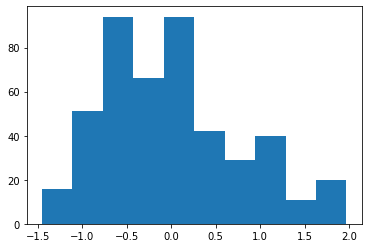

In [ ]:
pyplot.hist(ratings_df['beauty'])

Difference of beauty scroces of men and women

In [ ]:
ratings_df.groupby('gender').agg({'beauty':['mean','std','var']}).reset_index()

gender    beauty                   
               mean      std       var
0  female  0.116109  0.81781  0.668813
1    male -0.084482  0.75713  0.573246

Calution of tenture of the professors.

In [ ]:
tenure_count = ratings_df[ratings_df.tenure == 'yes'].groupby('gender').agg({'tenure':'count'}).reset_index()

In [ ]:
tenure_count['percentage']= 100*tenure_count.tenure/tenure_count.tenure.sum()
tenure_count

,gender,tenure,percentage
0,female,145,40.166205
1,male,216,59.833795


In [ ]:
tenure_count = ratings_df.groupby('minority').agg({'tenure':'count'}).reset_index()
#to find percentage
tenure_count['percentage'] = 100*tenure_count.tenure/tenure_count.sum()
tenure_count

,minority,tenure,percentage
0,no,399,NaN
1,yes,64,NaN


In [ ]:
ratings_df.groupby('tenure').agg({'age':['mean','std']}).reset_index()

tenure        age           
               mean        std
0     no  50.186275   6.946372
1    yes  47.850416  10.420056

(array([41., 37., 58., 48., 75., 74., 53., 69.,  0.,  8.]),
 array([29. , 33.4, 37.8, 42.2, 46.6, 51. , 55.4, 59.8, 64.2, 68.6, 73. ]),
 <a list of 10 Patch objects>)

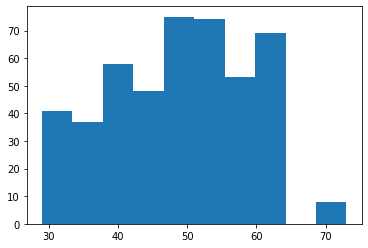

In [ ]:
pyplot.hist(ratings_df['age'])

Text(0.5, 1.0, 'Gender distribution bar plot')

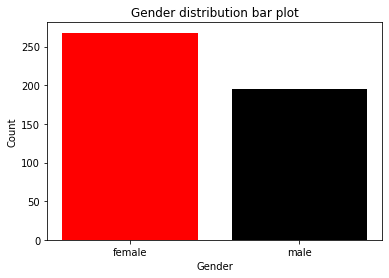

In [ ]:
pyplot.bar(ratings_df.gender.unique(),ratings_df.gender.value_counts(),color =['red','black'])
pyplot.xlabel('Gender')
pyplot.ylabel('Count')
pyplot.title('Gender distribution bar plot')                    

In [ ]:
ratings_df[ratings_df['tenure']=='yes']['eval'].median()

4.0

# **DATA** **VISUALIZATION**

Finding duplicate casesusing prof variables.

In [ ]:
ratings_df.prof.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55,
       56, 57, 58, 59, 60, 63, 64, 65, 66, 67, 68, 70, 71, 72, 73, 74, 75,
       76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92,
       93, 94, 22, 30, 40, 47, 61, 62, 69])

No of unique prof

In [ ]:
ratings_df.prof.nunique()

94

Avg and mean of age.

In [ ]:
ratings_df['age'].mean()

48.365010799136066

In [ ]:
ratings_df['age'].std()

9.80274203786482

first filtering duplicates.

In [ ]:
no_duplicates_ratings_df=ratings_df.drop_duplicates(subset=['prof'])
no_duplicates_ratings_df.head()

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1,0,1,1,0,1,1,1
4,no,59,male,more,-0.737732,4.5,upper,yes,yes,17,20,2,0,0,0,0,1,1,1
7,no,51,male,more,-0.571984,3.7,upper,yes,yes,55,55,3,0,0,0,0,1,1,1
9,no,40,female,more,-0.677963,4.3,upper,yes,yes,40,46,4,0,0,1,0,1,1,1
17,no,31,female,more,1.509794,4.4,upper,yes,yes,42,48,5,0,0,1,0,1,1,1


mean age of the non duplicate data.

In [ ]:
no_duplicates_ratings_df['age'].mean()

47.5531914893617

In [ ]:
no_duplicates_ratings_df['age'].std()

10.25651329515495

Bar Chart.

In [ ]:
ratings_df.head()

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1,0,1,1,0,1,1,1
1,yes,36,female,more,0.289916,3.7,upper,yes,yes,86,125,1,0,1,1,0,1,1,1
2,yes,36,female,more,0.289916,3.6,upper,yes,yes,76,125,1,0,1,1,0,1,1,1
3,yes,36,female,more,0.289916,4.4,upper,yes,yes,77,123,1,1,1,1,0,1,1,1
4,no,59,male,more,-0.737732,4.5,upper,yes,yes,17,20,2,0,0,0,0,1,1,1


In [ ]:
division_eval = ratings_df.groupby('division')[['eval']].mean().reset_index()

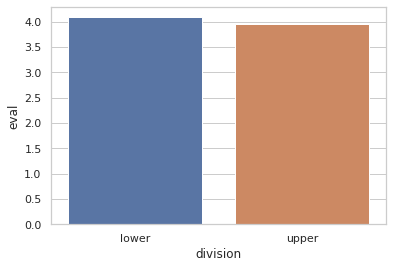

In [ ]:
sns.set(style="whitegrid")
ax = sns.barplot(x="division", y="eval", data = division_eval)

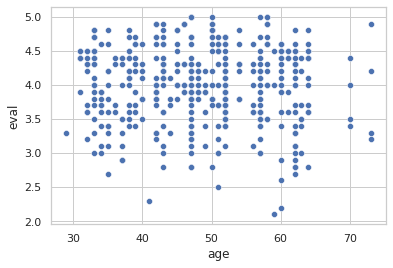

In [ ]:
ax= sns.scatterplot(x='age',y='eval', data=ratings_df)

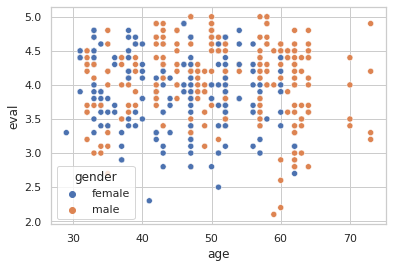

In [ ]:
ax= sns.scatterplot(x='age', y='eval', hue='gender',data=ratings_df)

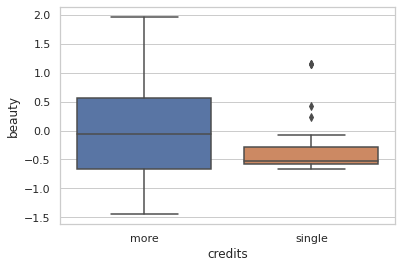

In [ ]:
ax= sns.boxplot(x='credits', y='beauty',data=ratings_df)

what is the number of courses taught by gender?

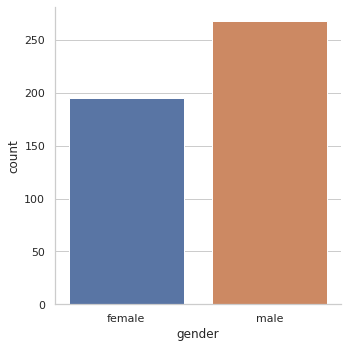

In [ ]:
sns.catplot(x='gender', kind='count', data= ratings_df)

Histogram of taught by gender and tenure

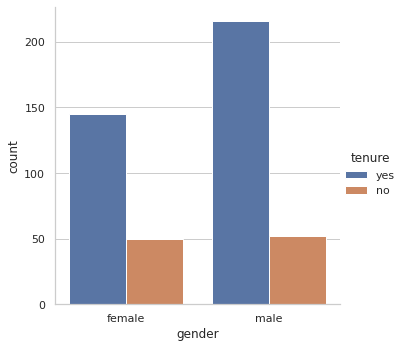

In [ ]:
sns.catplot(x='gender', hue='tenure', kind='count', data=ratings_df)

Create a group histogram of taught by gender and tenure.

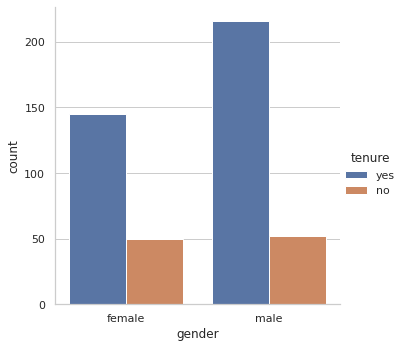

In [ ]:
sns.catplot(x='gender', hue='tenure', kind='count', data=ratings_df)

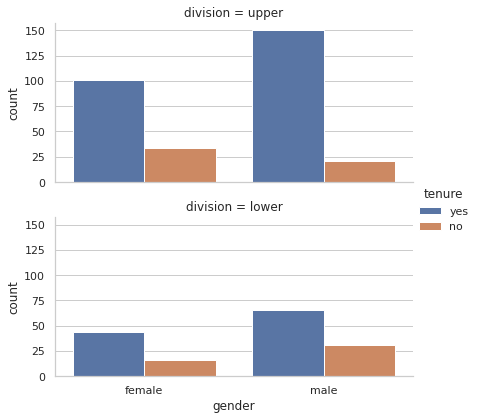

In [ ]:
sns.catplot(x='gender',hue='tenure', row ='division', kind ='count', data= ratings_df, height=3, aspect=2)

Cscatterplot of age and evaluation scores differentiated by gender.

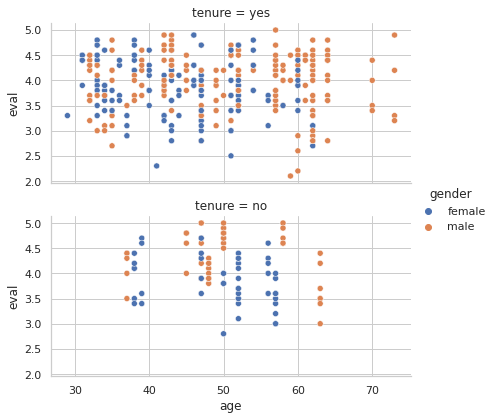

In [ ]:
sns.relplot(x="age",y="eval",hue="gender", row ="tenure", data=ratings_df, height =3, aspect=2)

Distribution Plot. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


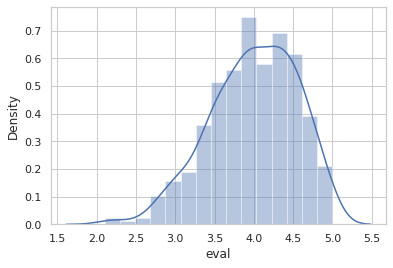

In [ ]:
ax= sns.distplot(ratings_df['eval'],kde=True)

Create a distribution plot of teaching evaluation with gender factor.

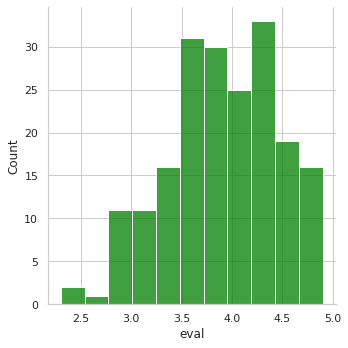

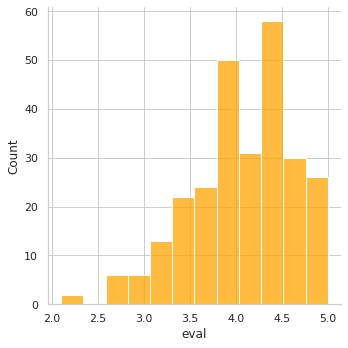

In [ ]:
sns.displot(ratings_df[ratings_df['gender']=='female']['eval'],color='green',kde=False)
sns.displot(ratings_df[ratings_df['gender']=='male']['eval'],color='orange',kde=False)

Box plot of age of the instructor by gender.

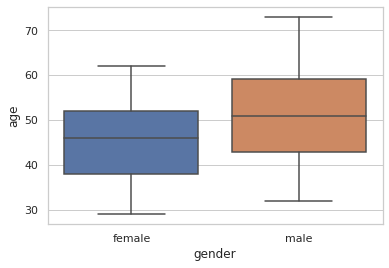

In [ ]:
ax = sns.boxplot(x="gender",y="age",data=ratings_df)

compare age along with tenure and gender.

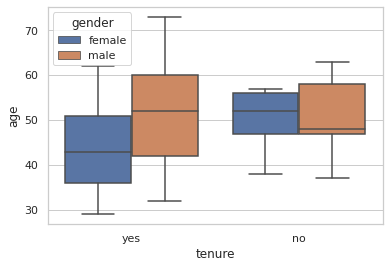

In [ ]:
ax=sns.boxplot(x="tenure",y="age",hue="gender",data=ratings_df)

Distribution plot of beauty scores with native english speaker as a factor.

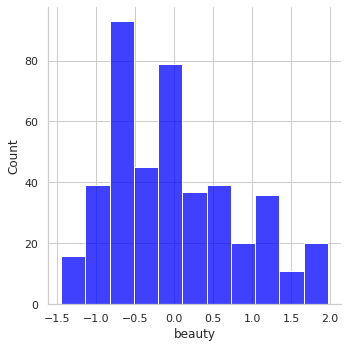

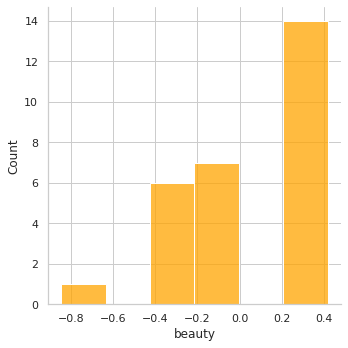

In [ ]:
sns.displot(ratings_df[ratings_df['native']=='yes']['beauty'], color='blue', kde=False)
sns.displot(ratings_df[ratings_df['native']=='no']['beauty'],color='orange', kde=False)

Horizontal box plot of the age of the instructors by visble minority.

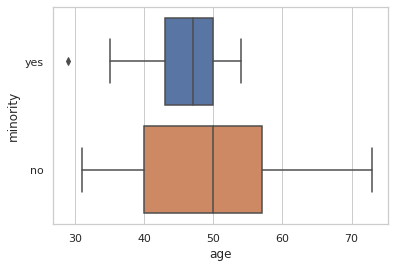

In [ ]:
ax = sns.boxplot(x="age", y= "minority", data=ratings_df)

Histogram of tenure by minority and the gender factor.

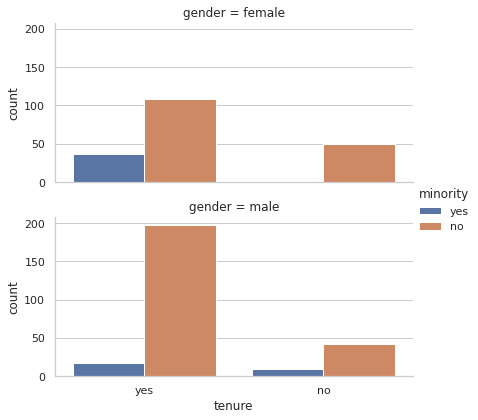

In [ ]:
sns.catplot(x='tenure', hue='minority', row ='gender', kind='count',data=ratings_df,height=3, aspect=2)

Box plot of age variable

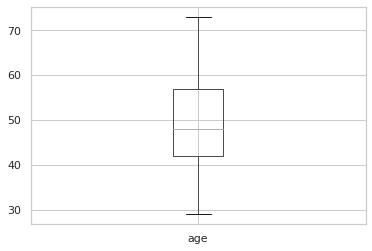

In [ ]:
ratings_df.boxplot('age')

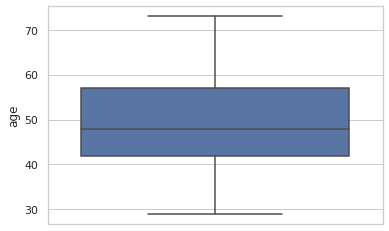

In [ ]:
ax= sns.boxplot(y="age",data=ratings_df)

## **Probability Distribution**

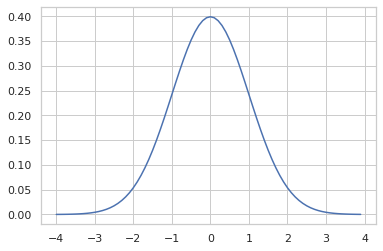

In [ ]:
from scipy.stats import norm
x_axis = np.arange(-4,4,0.1)
pyplot.plot(x_axis, norm.pdf(x_axis,0,1))
pyplot.show()


probability of receving an evaluation score of greater than 4.5 P(eval>4.5) =?


mean and st deviation of eval score.

In [ ]:
eval_mean = round(ratings_df['eval'].mean(),3)
eval_sd = round(ratings_df['eval'].std(),3)
print(eval_mean, eval_sd)

3.998 0.555


In [ ]:
prob0 = scipy.stats.norm.cdf((4.5-eval_mean)/eval_sd)
print(1-prob0)

0.1828639734596742


P(3.5<eval<4.2)=??

In [ ]:
x1 =3.5 
prob1 = scipy.stats.norm.cdf((x1-eval_mean/eval_sd))
print(prob1)

0.00010627915677070752


In [ ]:
x2 =4.2
prob2 = scipy.stats.norm.cdf((x2-eval_mean)/eval_sd)
print(prob2)

0.642057540461896


In [ ]:
round((prob2-prob1)*100,2)

64.2

Probability of eval score less than 3.3


In [ ]:
prob_less_than = scipy.stats.norm.cdf((3.3-eval_mean)/eval_sd)

In [ ]:
# probabaility of eval score betweeen 2 and 3
prob_less_than_2 = scipy.stats.norm.cdf((2- eval_mean)/eval_sd)
prob_less_than_3 = scipy.stats.norm.cdf((3-eval_mean)/eval_sd)

In [ ]:
round((prob_less_than_3- prob_less_than_2)*100,2)

3.59

Question 3: To test the hypothesis that sleeping for at least 8 hours makes one smarter, 12 people who have slept for at least 8 hours every day for the past one year have their IQ tested.

Here are the results: 116, 111, 101, 120, 99, 94, 106, 115, 107, 101, 110, 92

Test using the following hypotheses: H0: μ = 100 or Ha: μ > 100

In [ ]:
iqs = [116, 111, 101, 120, 99, 94, 106, 115, 107, 101, 110, 92]
sample_size = len(iqs)
degree_freedom = sample_size -1
iq_mean = sum(iqs)/sample_size
mean_diff = [(iq-iq_mean)**2 for iq in iqs]
iq_std = sqrt(sum(mean_diff)/degree_freedom)
variance = iq_std**2
print(f"IQ mean is {iq_mean},sd is {iq_std}, variance is {variance}")
round(1-scipy.stats.norm.cdf((iq_mean-100)/(iq_std/sqrt(12))),3)

IQ mean is 106.0,sd is 8.831760866327848, variance is 78.00000000000001


0.009

# **Hypothesis Testing**

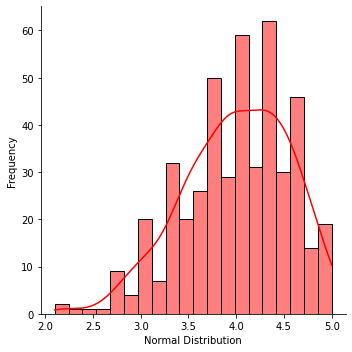

In [ ]:
ax = sns.displot(ratings_df['eval'], bins =20, kde=True,color='red')
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

Levene's Test in Python.

In [ ]:
scipy.stats.levene(ratings_df[ratings_df['gender']=='female']['eval'],
                   ratings_df[ratings_df['gender']=='male']['eval'],center='mean')

LeveneResult(statistic=0.19032922435292574, pvalue=0.6628469836244741)

since the p-value is greater than 0.05 we can assume equality of the variance.

In [ ]:
scipy.stats.ttest_ind(ratings_df[ratings_df['gender']=='female']['eval'],ratings_df[ratings_df['gender']=='male']['eval'],equal_var=True)

Ttest_indResult(statistic=-3.249937943510772, pvalue=0.0012387609449522217)

ANOVA(analyis of the variance)

In [ ]:
ratings_df.loc[(ratings_df['age'] <= 40), 'age_group'] = '40 years and younger'
ratings_df.loc[(ratings_df['age'] > 40)&(ratings_df['age'] < 57), 'age_group'] = 'between 40 and 57 years'
ratings_df.loc[(ratings_df['age'] >= 57), 'age_group'] = '57 years and older'

State the hypothesis
H_0: u_1=u_2=u_3 (the three population means are equal)
H_1 : At least one of the means differ

In [ ]:
scipy.stats.levene(ratings_df[ratings_df['age_group'] == '40 years and younger']['beauty'],
                   ratings_df[ratings_df['age_group'] == 'between 40 and 57 years']['beauty'], 
                   ratings_df[ratings_df['age_group'] == '57 years and older']['beauty'], 
                   center='mean')

LeveneResult(statistic=8.60005668392584, pvalue=0.000215366180993476)

In [ ]:
forty_lower = ratings_df[ratings_df['age_group'] == '40 years and younger']['beauty']
forty_fiftyseven = ratings_df[ratings_df['age_group'] == 'between 40 and 57 years']['beauty']
fiftyseven_older = ratings_df[ratings_df['age_group'] == '57 years and older']['beauty']

In [ ]:
f_statistic, p_value = scipy.stats.f_oneway(forty_lower, forty_fiftyseven, fiftyseven_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 17.597558611010122, P-Value: 4.3225489816137975e-08


Test for equality of variance

In [ ]:
scipy.stats.levene(ratings_df[ratings_df['age_group'] == '40 years and younger']['eval'],
                   ratings_df[ratings_df['age_group'] == 'between 40 and 57 years']['eval'], 
                   ratings_df[ratings_df['age_group'] == '57 years and older']['eval'], 
                   center='mean')

LeveneResult(statistic=3.820237661494229, pvalue=0.02262141852021939)

In [ ]:
forty_lower_eval = ratings_df[ratings_df['age_group'] == '40 years and younger']['eval']
forty_fiftyseven_eval = ratings_df[ratings_df['age_group'] == 'between 40 and 57 years']['eval']
fiftyseven_older_eval = ratings_df[ratings_df['age_group'] == '57 years and older']['eval']

In [ ]:
f_statistics, p_value = scipy.stats.f_oneway(forty_lower_eval,forty_fiftyseven_eval,fiftyseven_older_eval)
print("F_Statistics:{0}, P-value: {1}".format(f_statistics, p_value))

F_Statistics:1.2226327996572206, P-value: 0.29540894225417536


Chi-square: Using the teachers ratings data set, is there an association between tenure and gender?


H_0: tenured and independent of the gender
H_1: tenured is associatted with gender.

Cross table.

In [ ]:
cont_table = pd.crosstab(ratings_df['tenure'], ratings_df['gender'])
cont_table

gender,female,male
tenure,,
no,50,52
yes,145,216


In [ ]:
scipy.stats.chi2_contingency(cont_table, correction= True)

(2.20678166999886, 0.1374050603563787, 1, array([[ 42.95896328,  59.04103672],
        [152.04103672, 208.95896328]]))

Correlation: between evalution score and beauty. 
H_0: eval and beauty is not correlated
H_1: eval and beauty is correlated

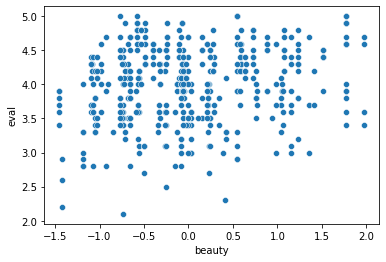

In [ ]:
ax= sns.scatterplot(x="beauty", y="eval", data=ratings_df)

The value of the Pearson correlation coefficient ranges between -1 to +1. If it is near -1, there is a strong negative linear relationship between variables. If it is 0, there is no linear relation, and at +1, there is a strong relationship between variables.

In [ ]:
scipy.stats.pearsonr(ratings_df['beauty'], ratings_df['eval'])

(0.18903909084045206, 4.247115419812485e-05)

Is tenure affect teaching score?


In [ ]:
scipy.stats.ttest_ind(ratings_df[ratings_df['tenure']=='yes']['eval'], ratings_df[ratings_df['tenure']=='no']['eval'], equal_var = True)

Ttest_indResult(statistic=-2.8046798258451777, pvalue=0.005249471210198792)

Is there is association between age and tenure?

H_0: Both have no association.
H_1: both are associated.

In [ ]:
cont_table =pd.crosstab(ratings_df['age'],ratings_df['gender'])
cont_table

gender,female,male
age,,
29,1,0
31,6,0
32,0,11
33,18,5
34,8,3
35,3,9
36,4,0
37,4,6
38,13,4


In [ ]:
scipy.stats.chi2_contingency(cont_table, correction =True)

(160.84771010789723,
 2.150948700651051e-18,
 34,
 array([[ 0.42116631,  0.57883369],
        [ 2.52699784,  3.47300216],
        [ 4.63282937,  6.36717063],
        [ 9.68682505, 13.31317495],
        [ 4.63282937,  6.36717063],
        [ 5.05399568,  6.94600432],
        [ 1.68466523,  2.31533477],
        [ 4.21166307,  5.78833693],
        [ 7.15982721,  9.84017279],
        [ 4.21166307,  5.78833693],
        [ 3.36933045,  4.63066955],
        [ 0.42116631,  0.57883369],
        [ 9.26565875, 12.73434125],
        [10.52915767, 14.47084233],
        [ 1.68466523,  2.31533477],
        [ 4.21166307,  5.78833693],
        [ 3.79049676,  5.20950324],
        [17.26781857, 23.73218143],
        [ 3.36933045,  4.63066955],
        [ 2.94816415,  4.05183585],
        [ 8.00215983, 10.99784017],
        [ 8.00215983, 10.99784017],
        [19.79481641, 27.20518359],
        [ 3.36933045,  4.63066955],
        [ 3.36933045,  4.63066955],
        [11.79265659, 16.20734341],
        [ 5.89

Test for equality of variance for beauty score between tenues and non-tenured

The Levene test tests the null hypothesis that all input samples are from populations with equal variances

In [ ]:
scipy.stats.levene(ratings_df[ratings_df['tenure']=='yes']['beauty'], ratings_df[ratings_df['tenure']=='no']['beauty'], center ='mean')

LeveneResult(statistic=0.4884241652750426, pvalue=0.4849835158609811)

as p value is greater than 
0.05 we can assume equality of variance of both groups.

Is therw is an association between minorities and tenure?

H_0: 

In [ ]:
cont_table  = pd.crosstab(ratings_df['vismin'], ratings_df['tenure'])

In [ ]:
scipy.stats.chi2_contingency(cont_table, correction = True)

(1.3675127484429763,
 0.24223968800237178,
 1,
 array([[ 87.90064795, 311.09935205],
        [ 14.09935205,  49.90064795]]))

# **Regression**

In [7]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

H_0 : B1 =0 gender as no effect on evalscore
H_1: B1 is not equal to 0 (gender as effect on evalscore).

female=1 and male =0

In [ ]:
X = ratings_df['female']
Y = ratings_df['eval']
X = sm.add_constant(X)

model = sm.OLS(Y,X).fit()
predictions = model.predict(X)
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   eval   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     10.56
Date:                Fri, 08 Jul 2022   Prob (F-statistic):            0.00124
Time:                        09:37:39   Log-Likelihood:                -378.50
No. Observations:                 463   AIC:                             761.0
Df Residuals:                     461   BIC:                             769.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0690      0.034    121.288      0.000       4.003       4.135
female        -0.1680      0.052     -3.250      0.001      -0.270      -0.066
==============================================================================
Omnibus:                       17.625   Durbin-Watson:                   1.209
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.970
Skew:                          -0.496   Prob(JB):                     7.60e-05
Kurtosis:                       2.981   Cond. No.                         2.47
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Regression with ANOVA: Using the teachers' rating data set, does beauty score for instructors differ by age?

H_0 : u1 =u2=u3 (three population means are equal)
H_1: Atleast one of the means differ

In [ ]:
ratings_df.loc[(ratings_df['age'] <= 40), 'age_group'] = '40 years and younger'
ratings_df.loc[(ratings_df['age'] > 40)&(ratings_df['age'] < 57), 'age_group'] = 'between 40 and 57 years'
ratings_df.loc[(ratings_df['age'] >= 57), 'age_group'] = '57 years and older'

In [ ]:
from statsmodels.formula.api import ols
lm = ols('beauty ~ age_group ', data = ratings_df).fit()
tables = sm.stats.anova_lm(lm)
print(tables)

              df      sum_sq    mean_sq          F        PR(>F)
age_group    2.0   20.422744  10.211372  17.597559  4.322549e-08
Residual   460.0  266.925153   0.580272        NaN           NaN


In [ ]:
X  = pd.get_dummies(ratings_df[['age_group']])
y= ratings_df['beauty']
X = sm.add_constant(X)

model = sm.OLS(y,X).fit()
predictions = model.predict(X)

model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 beauty   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     17.60
Date:                Fri, 08 Jul 2022   Prob (F-statistic):           4.32e-08
Time:                        09:48:44   Log-Likelihood:                -529.47
No. Observations:                 463   AIC:                             1065.
Df Residuals:                     460   BIC:                             1077.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 0.0138      0.028      0.496      0.620      -0.041       0.069
age_group_40 years and younger        0.3224      0.058      5.574      0.000       0.209       0.436
age_group_57 years and older         -0.2596      0.056     -4.621      0.000      -0.370      -0.149
age_group_between 40 and 57 years    -0.0489      0.045     -1.081      0.280      -0.138       0.040
==============================================================================
Omnibus:                       11.586   Durbin-Watson:                   0.434
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.114
Skew:                           0.394   Prob(JB):                      0.00234
Kurtosis:                       2.913   Cond. No.                     5.98e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.79e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Correlation: Using the teachers' rating dataset, Is teaching evaluation score correlated with beauty score?

In [ ]:
X = ratings_df['beauty']
Y = ratings_df['eval']
X =sm.add_constant(X)

model = sm.OLS(Y,X).fit()
predictions = model.predict(X)

model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   eval   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     17.08
Date:                Fri, 08 Jul 2022   Prob (F-statistic):           4.25e-05
Time:                        09:55:22   Log-Likelihood:                -375.32
No. Observations:                 463   AIC:                             754.6
Df Residuals:                     461   BIC:                             762.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9983      0.025    157.727      0.000       3.948       4.048
beauty         0.1330      0.032      4.133      0.000       0.070       0.196
==============================================================================
Omnibus:                       15.399   Durbin-Watson:                   1.238
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.405
Skew:                          -0.453   Prob(JB):                     0.000274
Kurtosis:                       2.831   Cond. No.                         1.27
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Using the teachers' rating data set, does tenure affect beauty scores?

In [ ]:
X = ratings_df['tenured_prof']
y = ratings_df['eval']
X = sm.add_constant(X)

model = sm.OLS(y,X).fit()
predictions = model.predict(X)
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   eval   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     7.866
Date:                Fri, 08 Jul 2022   Prob (F-statistic):            0.00525
Time:                        10:01:28   Log-Likelihood:                -379.83
No. Observations:                 463   AIC:                             763.7
Df Residuals:                     461   BIC:                             771.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.1333      0.055     75.791      0.000       4.026       4.241
tenured_prof    -0.1732      0.062     -2.805      0.005      -0.295      -0.052
==============================================================================
Omnibus:                       17.543   Durbin-Watson:                   1.207
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.842
Skew:                          -0.484   Prob(JB):                     8.10e-05
Kurtosis:                       2.803   Cond. No.                         4.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Question 2: Using the teachers' rating data set, does being an English speaker affect the number of students assigned to professors?

In [ ]:
X = ratings_df['English_speaker']
y = ratings_df['allstudents']
X = sm.add_constant(X)

model = sm.OLS(y,X).fit()
predictions = model.predict(X)

model.summary()


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            allstudents   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     3.476
Date:                Fri, 08 Jul 2022   Prob (F-statistic):             0.0629
Time:                        10:06:51   Log-Likelihood:                -2654.2
No. Observations:                 463   AIC:                             5312.
Df Residuals:                     461   BIC:                             5321.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              29.6071     14.150      2.092      0.037       1.802      57.413
English_speaker    27.2158     14.598      1.864      0.063      -1.471      55.902
==============================================================================
Omnibus:                      429.792   Durbin-Watson:                   0.708
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10527.126
Skew:                           4.129   Prob(JB):                         0.00
Kurtosis:                      24.852   Cond. No.                         8.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Question 3: Using the teachers' rating data set, what is the correlation between the number of students who participated in the evaluation survey and evaluation scores?

In [ ]:
X = ratings_df['beauty']
y = ratings_df['eval']

X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
predictions = model.predict(X)

model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   eval   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     17.08
Date:                Fri, 08 Jul 2022   Prob (F-statistic):           4.25e-05
Time:                        10:18:38   Log-Likelihood:                -375.32
No. Observations:                 463   AIC:                             754.6
Df Residuals:                     461   BIC:                             762.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9983      0.025    157.727      0.000       3.948       4.048
beauty         0.1330      0.032      4.133      0.000       0.070       0.196
==============================================================================
Omnibus:                       15.399   Durbin-Watson:                   1.238
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.405
Skew:                          -0.453   Prob(JB):                     0.000274
Kurtosis:                       2.831   Cond. No.                         1.27
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

N_0 :- English speaking has no effect on gender
N_1 :- English speaking is gender based

In [ ]:
x = ratings_df['female']
y = ratings_df['English_speaker']

y = sm.add_constant(x)
model = sm.OLS(x,y).fit()
predictions = model.predict(y)
model.summary()


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 female   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.792e+32
Date:                Wed, 20 Jul 2022   Prob (F-statistic):               0.00
Time:                        07:03:30   Log-Likelihood:                 15442.
No. Observations:                 463   AIC:                        -3.088e+04
Df Residuals:                     461   BIC:                        -3.087e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.322e-16   4.85e-17      8.914      0.000    3.37e-16    5.27e-16
female         1.0000   7.47e-17   1.34e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                     2098.083   Durbin-Watson:                   0.360
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.367
Skew:                           0.319   Prob(JB):                     1.58e-17
Kurtosis:                       1.102   Cond. No.                         2.47
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As p- value is less than 0.05 we reject the null hypothesis and say that there are female who